# HR Analytics - Employee Attrition Rate

## Introduction

#### a growing company is facing a high attrition rate among their employees which in turn affects their business due to lack of expertise and experience. Their HR department is assigned the task to reduce the attrition rate by retaining employees who are about to churn out. They need to recommend special plans or strategies which will help them to retain their employees which in turn will help them to grow bigger as a company.

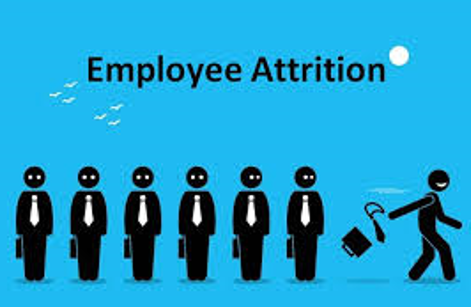

In [4]:
from IPython.display import Image
img = Image(filename=r'D:\User\Pictures\image .png',width = 1000)
img

### Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Importing

In [3]:
df = pd.read_csv(r'D:\User\Desktop\employees.csv')
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.37,0.52,2,159,3,0,0,sales,low,1
4,0.41,0.50,2,153,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,0,support,medium,1
14995,0.99,0.83,4,274,2,0,0,sales,low,0
14996,0.72,0.72,4,175,4,0,0,technical,low,0
14997,0.24,0.91,5,177,5,0,0,sales,low,0


In [4]:
df.head(10)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.37,0.52,2,159,3,0,0,sales,low,1
4,0.41,0.50,2,153,3,0,0,sales,low,1
5,0.10,0.77,6,247,4,0,0,sales,low,1
6,0.92,0.85,5,259,5,0,0,sales,low,1
7,0.42,0.53,2,142,3,0,0,sales,low,1
8,0.45,0.54,2,135,3,0,0,sales,low,1
9,0.11,0.81,6,305,4,0,0,sales,low,1


### Information checking

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   promotionInLast5years  14999 non-null  int64  
 7   dept                   14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Data Preprocessing:

### Missing Value Treatment:

In [9]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
promotionInLast5years    0
dept                     0
salary                   0
left                     0
dtype: int64

In [10]:
features=df.iloc[:,:-1]
features

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.37,0.52,2,159,3,0,0,sales,low
4,0.41,0.50,2,153,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,0,support,medium
14995,0.99,0.83,4,274,2,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,sales,low


In [11]:
target=df.iloc[:,-1]
target

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    0
14996    0
14997    0
14998    0
Name: left, Length: 14999, dtype: int64

### Finding And Removing Duplicate Values


In [13]:
df.duplicated().sum()

3008

In [14]:
df=df.drop_duplicates(keep ='first')
df.duplicated().sum()

0

In [15]:
df.shape

(11991, 10)

### Checking Data Is Balanced Or Imbalanced:

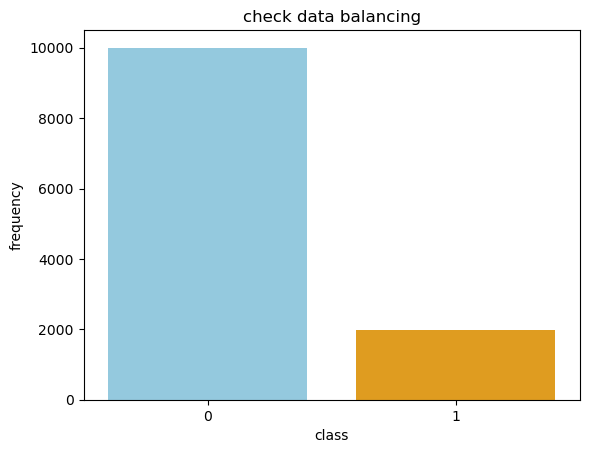

In [17]:
sns.countplot(x=df["left"],palette=['skyblue','orange'])
plt.xlabel("class")
plt.ylabel("frequency")
plt.title("check data balancing")
plt.show()

### Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["salary"]=le.fit_transform(df["salary"])
df["dept"]=le.fit_transform(df["dept"])

In [20]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.37,0.52,2,159,3,0,0,7,1,1
4,0.41,0.50,2,153,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,3,1,0
14995,0.99,0.83,4,274,2,0,0,7,1,0
14996,0.72,0.72,4,175,4,0,0,9,1,0
14997,0.24,0.91,5,177,5,0,0,7,1,0


### Correlation

In [22]:
df.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,left
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,0.019789,0.006941,0.007216,-0.350558
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,-0.007206,0.004309,0.007091,0.013520
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,-0.000544,0.010101,0.003199,0.030928
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,-0.004964,0.000623,0.002727,0.070409
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.056828,-0.017806,0.000369,0.173295
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,0.029852,0.006560,-0.003654,-0.125436
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,1.000000,-0.023826,0.004832,-0.044657
dept,0.006941,0.004309,0.010101,0.000623,-0.017806,0.006560,-0.023826,1.000000,0.006702,0.018286
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004832,0.006702,1.000000,0.004224
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,-0.044657,0.018286,0.004224,1.000000


In [23]:
df.corr()["left"]

satisfactoryLevel       -0.350558
lastEvaluation           0.013520
numberOfProjects         0.030928
avgMonthlyHours          0.070409
timeSpent.company        0.173295
workAccident            -0.125436
promotionInLast5years   -0.044657
dept                     0.018286
salary                   0.004224
left                     1.000000
Name: left, dtype: float64

### Data Visualization

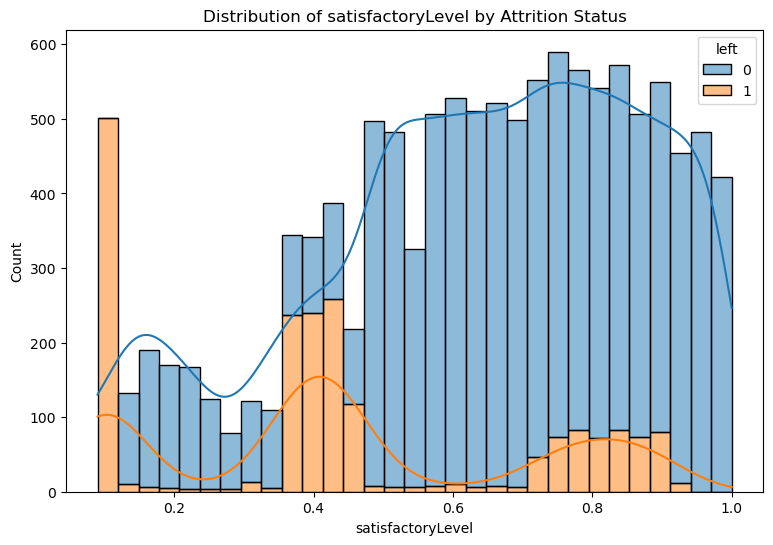

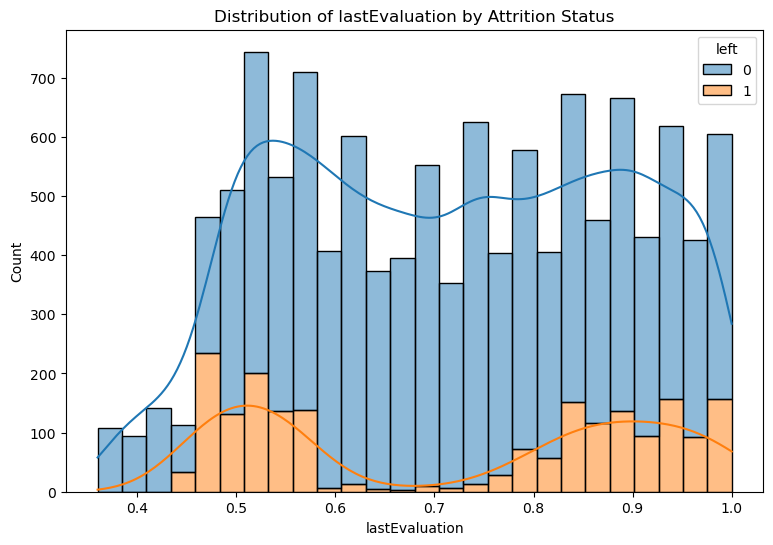

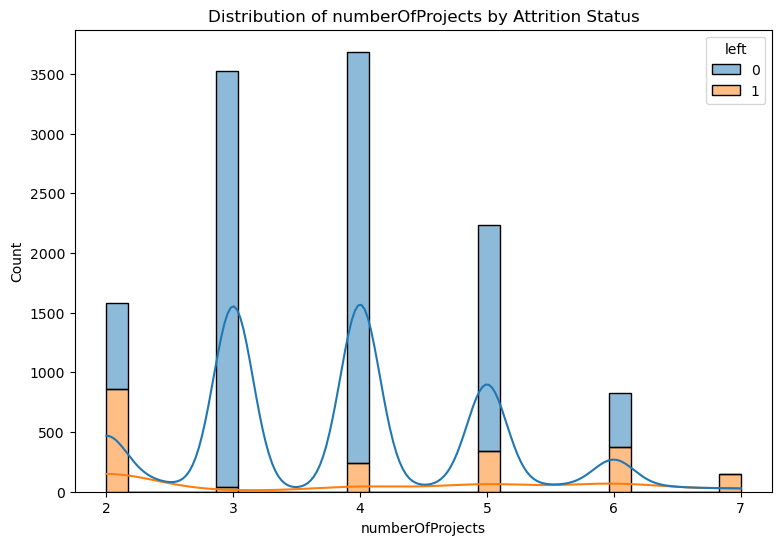

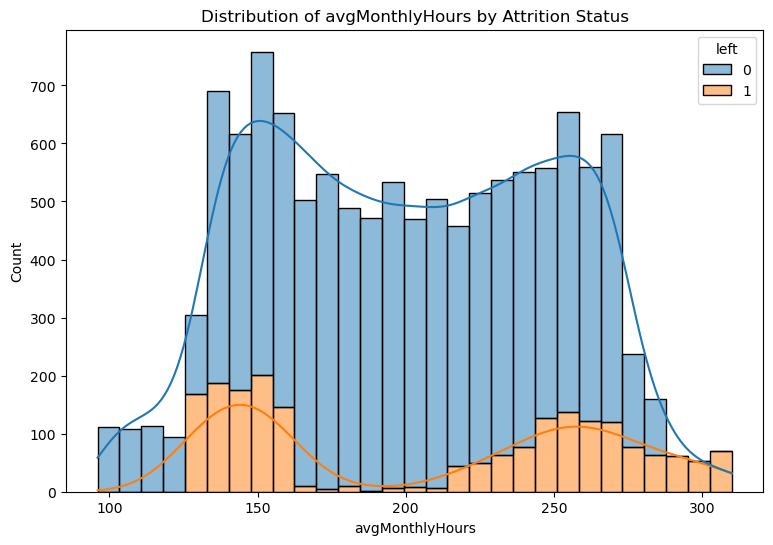

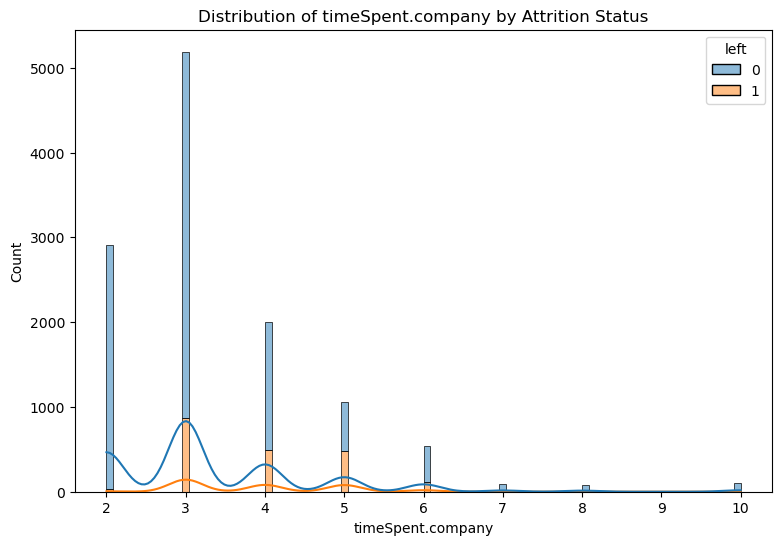

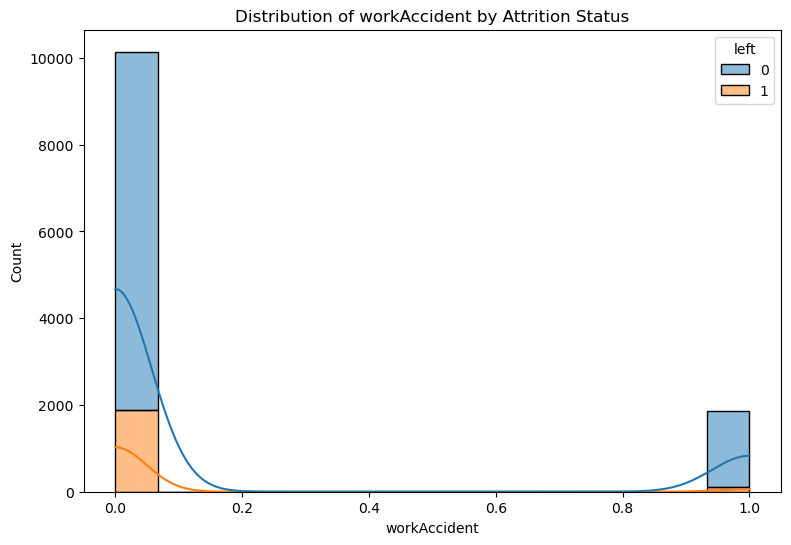

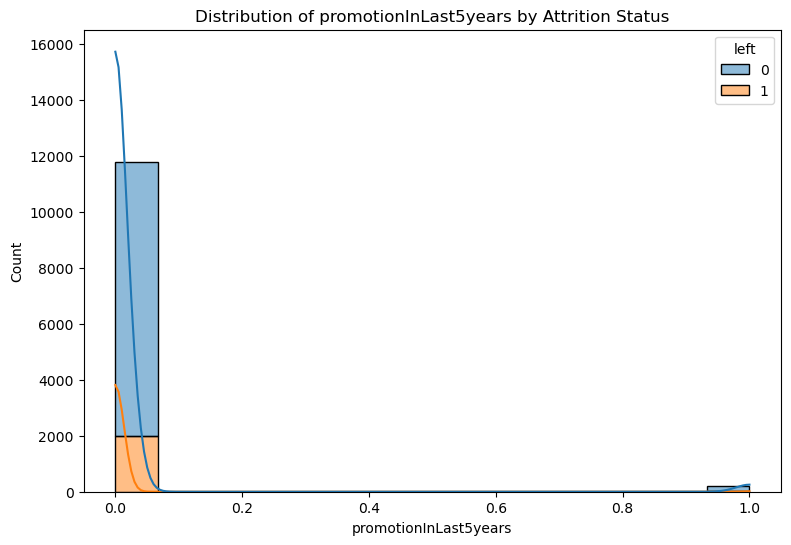

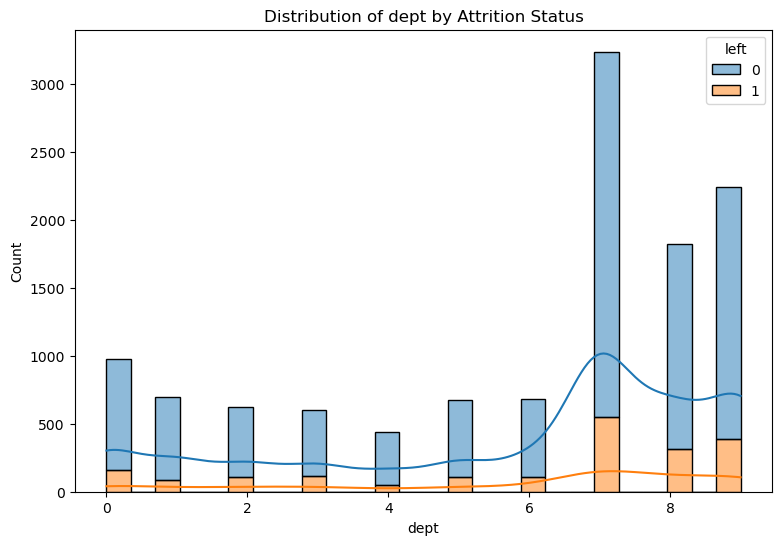

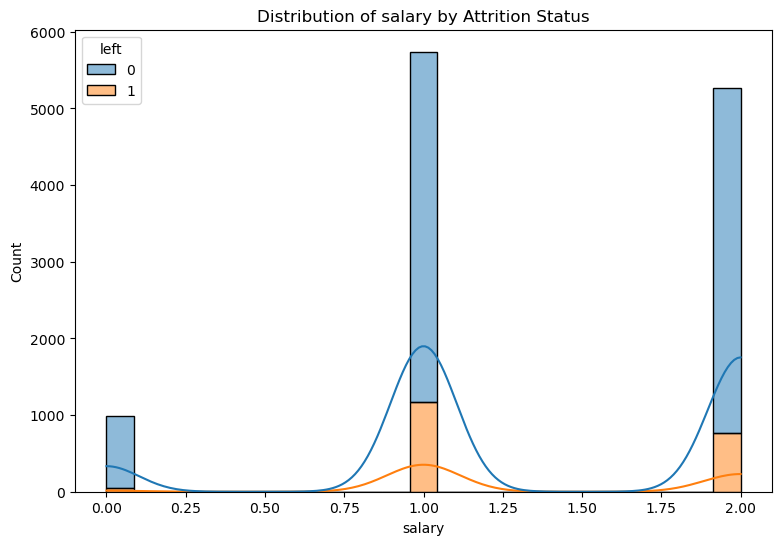

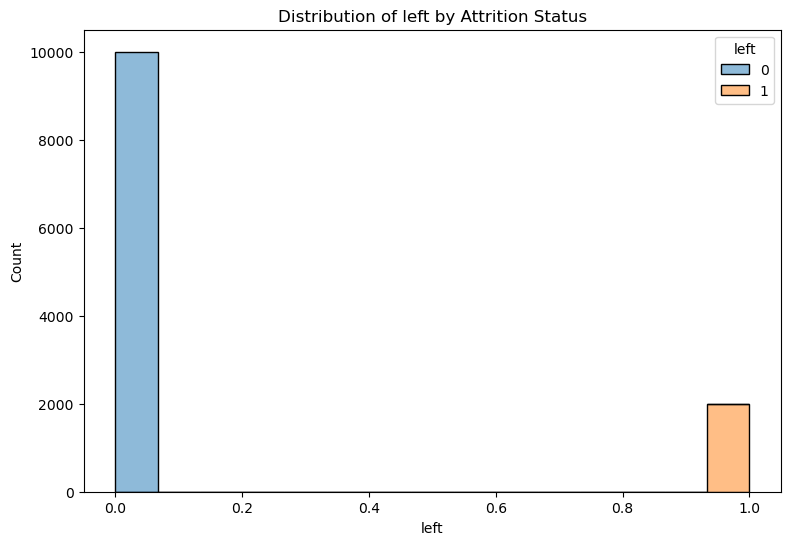

In [25]:
numeric_columns = df.select_dtypes(include=['number']).columns
for feature in numeric_columns:
    plt.figure(figsize=(9, 6))
    sns.histplot(df, x=feature, hue="left", multiple="stack", kde=True)
    plt.title(f"Distribution of {feature} by Attrition Status")
    plt.show()

<Axes: >

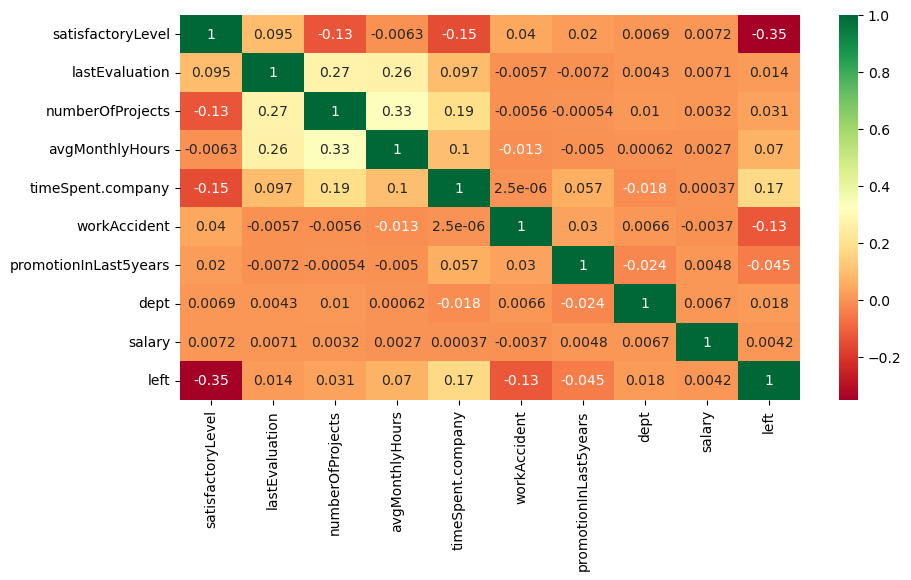

In [26]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), cmap = "RdYlGn", annot = True)

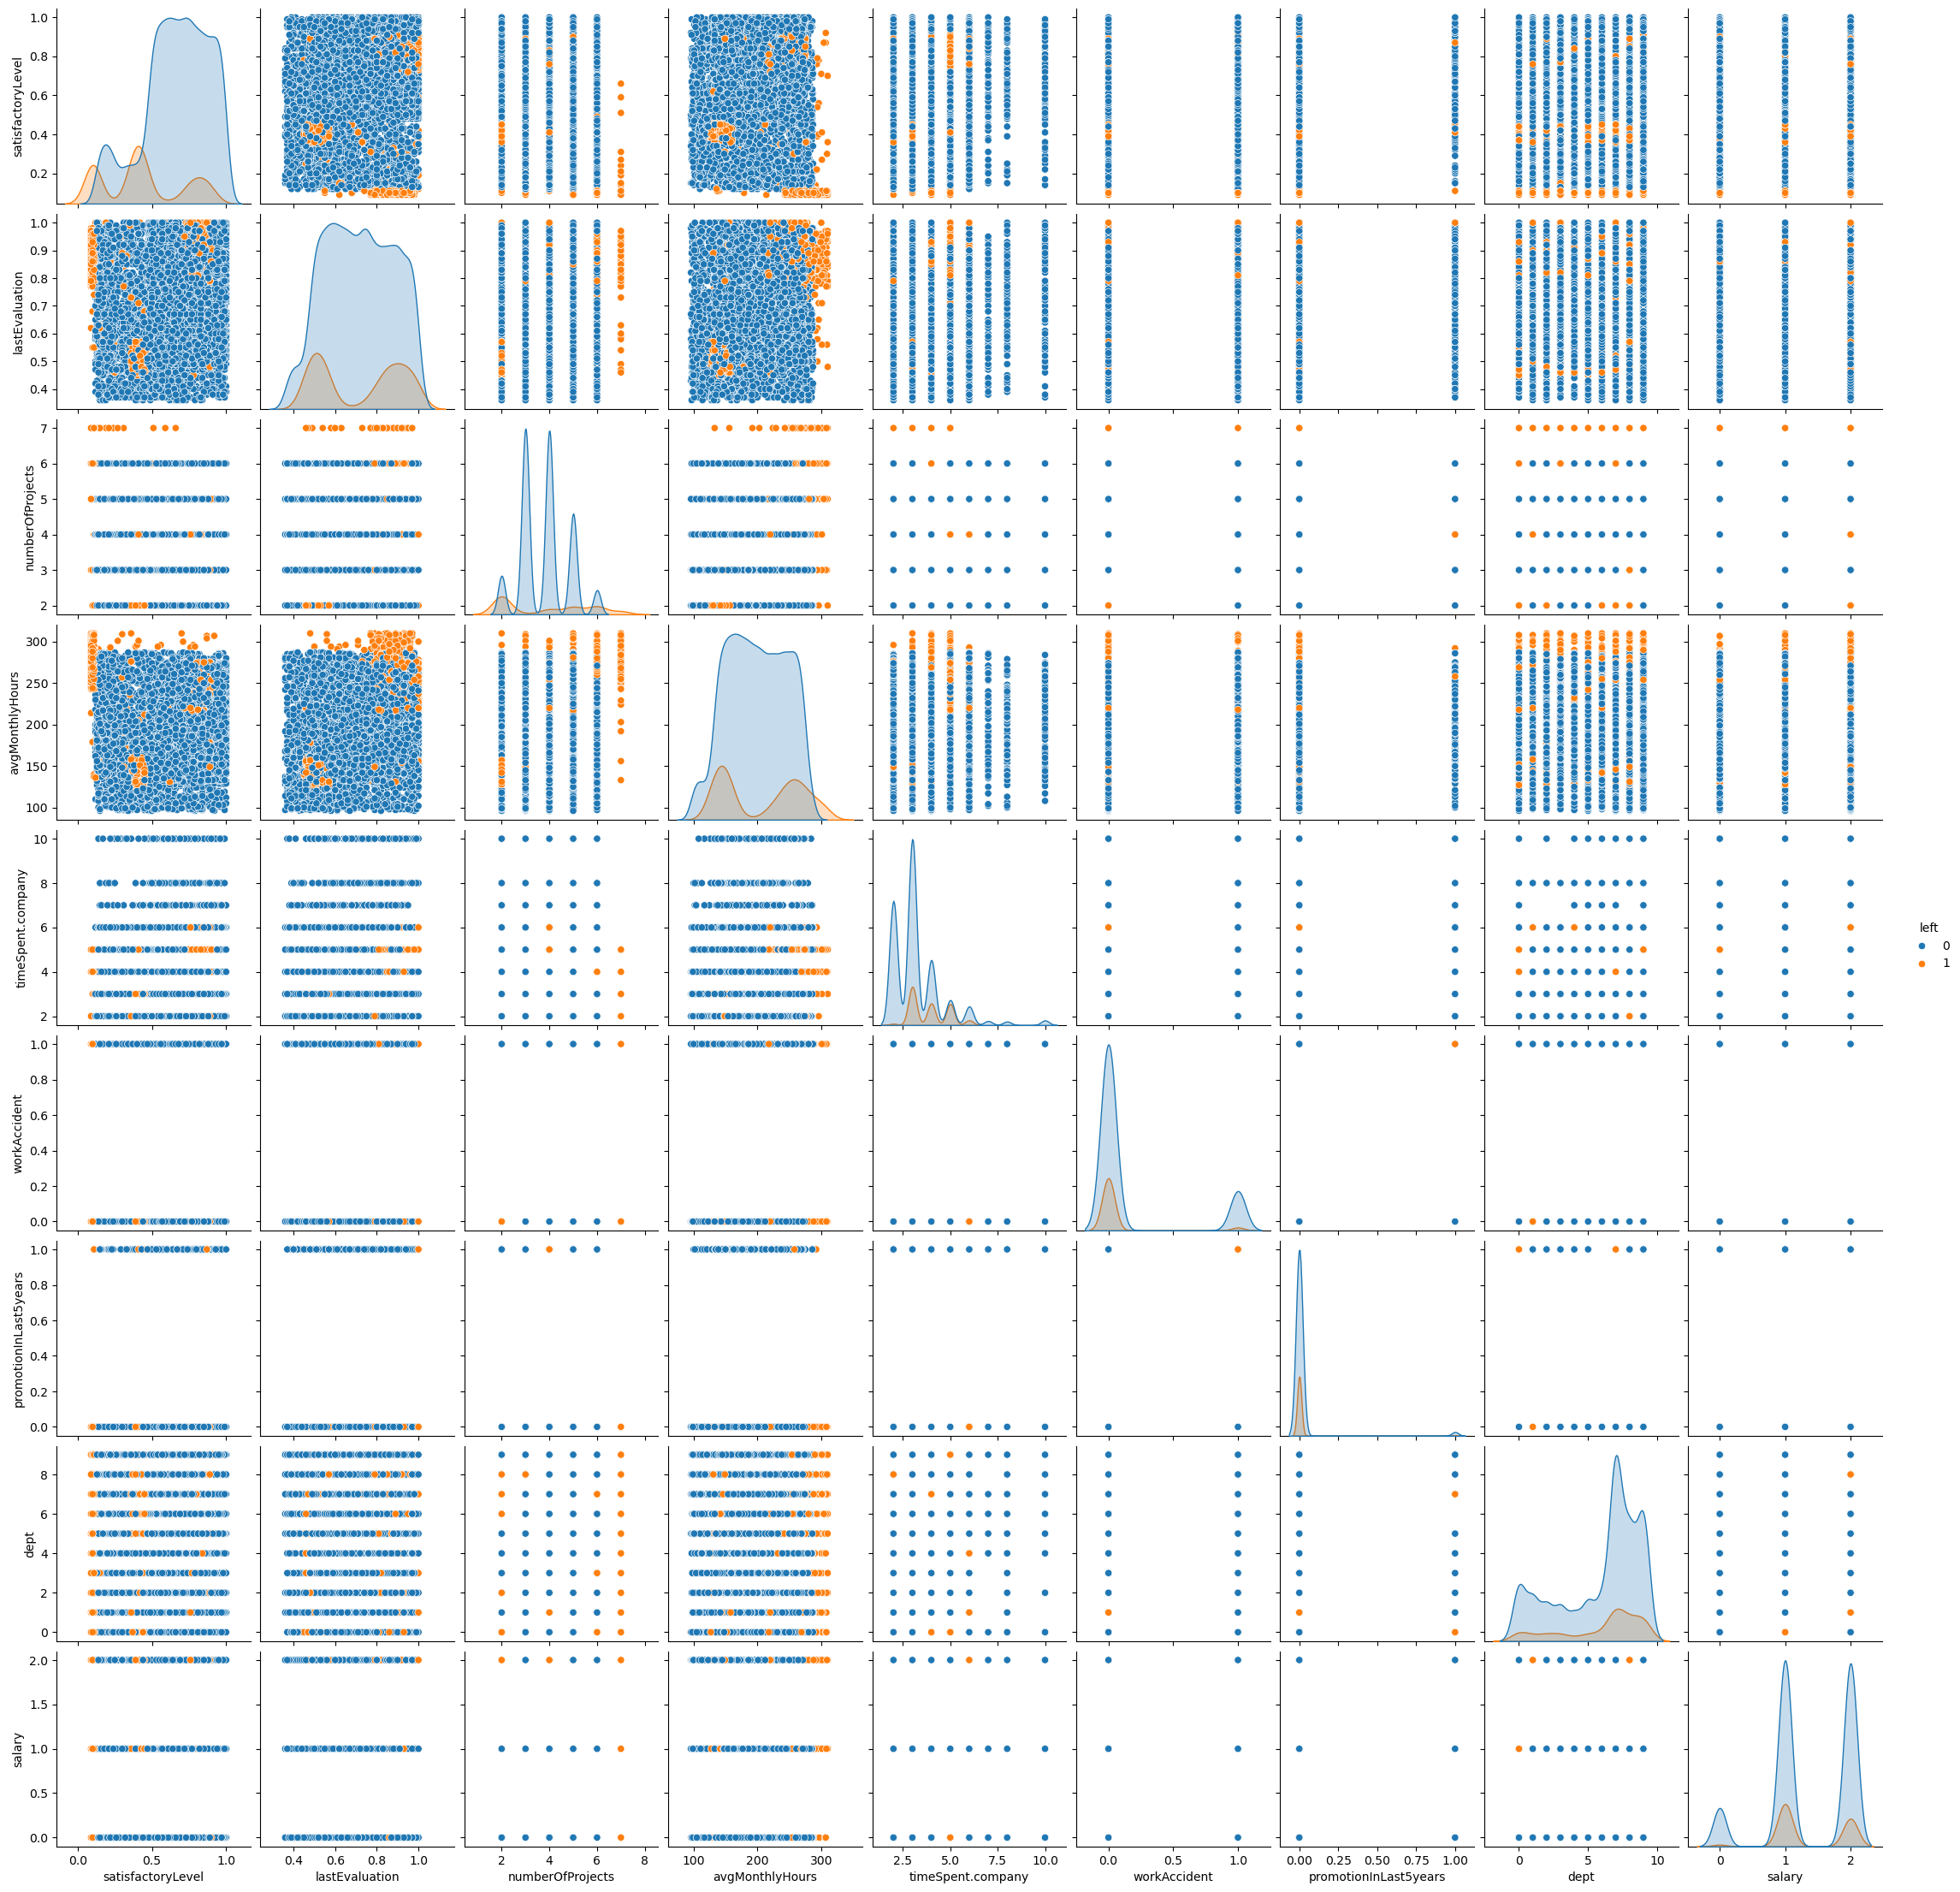

In [28]:
sns.pairplot(df,hue="left")
plt.show()

### Standard Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
X=df.drop(["left"],axis=1)
y=df["left"]

X =sc.fit_transform(X)

In [34]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.37,0.52,2,159,3,0,0,7,1,1
4,0.41,0.50,2,153,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,3,1,0
14995,0.99,0.83,4,274,2,0,0,7,1,0
14996,0.72,0.72,4,175,4,0,0,9,1,0
14997,0.24,0.91,5,177,5,0,0,7,1,0


### Train Test Split

### Balancing the data

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x_balanced,y_balanced=oversample.fit_resample(X,y)
y_balanced=pd.Series(y_balanced)

print("Impact counts before balancing:\n ",y.value_counts())
print("Impact counts after balancing: \n",y_balanced.value_counts())

Impact counts before balancing:
  left
0    10000
1     1991
Name: count, dtype: int64
Impact counts after balancing: 
 left
1    10000
0    10000
Name: count, dtype: int64


In [46]:
y = y.astype("category")
y_balanced.astype("category")

0        1
1        1
2        1
3        1
4        1
        ..
19995    1
19996    1
19997    1
19998    1
19999    1
Name: left, Length: 20000, dtype: category
Categories (2, int64): [0, 1]

In [48]:
print("y values:",y.head())
print("y_balanced values:",y_balanced.head())

y values: 0    1
1    1
2    1
3    1
4    1
Name: left, dtype: category
Categories (2, int64): [0, 1]
y_balanced values: 0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64


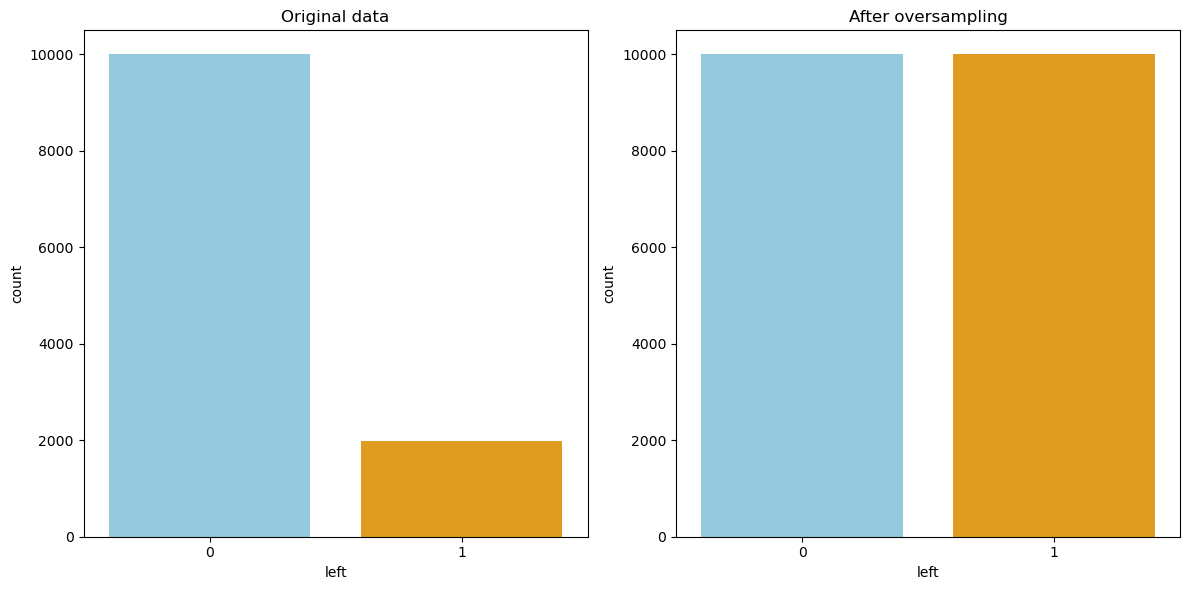

In [49]:
figure,axes=plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=y,ax=axes[0],palette=['skyblue','orange'])
axes[0].set_title('Original data')


sns.countplot(x=y_balanced,ax=axes[1],palette=['skyblue','orange'])
axes[1].set_title('After oversampling')
plt.tight_layout()
plt.show()

In [50]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.37,0.52,2,159,3,0,0,7,1,1
4,0.41,0.50,2,153,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,3,1,0
14995,0.99,0.83,4,274,2,0,0,7,1,0
14996,0.72,0.72,4,175,4,0,0,9,1,0
14997,0.24,0.91,5,177,5,0,0,7,1,0


### Fitting the dataset to various models

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier ()
gb = GradientBoostingClassifier ()
ab = AdaBoostClassifier ()
dt = DecisionTreeClassifier ()
xgb =  XGBClassifier()

In [59]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Accuracy Score :",accuracy_score(y_test,y_pred))
    print("Classification report :",classification_report(y_test,y_pred))

    train = model.score(X_train,y_train)
    test = model.score(X_test,y_test)

    print("Training score :",train)
    print("Testing score :",test)

    return model
   

### LogisticRegression()

In [61]:
mymodel(logreg)

Accuracy Score : 0.8435241801000556
Classification report :               precision    recall  f1-score   support

           0       0.87      0.96      0.91      3015
           1       0.54      0.22      0.32       583

    accuracy                           0.84      3598
   macro avg       0.70      0.59      0.61      3598
weighted avg       0.81      0.84      0.82      3598

Training score : 0.8290241868223519
Testing score : 0.8435241801000556


LogisticRegression()

### KNeighborsClassifier()

In [63]:
mymodel(knn)

Accuracy Score : 0.9630350194552529
Classification report :               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3015
           1       0.87      0.90      0.89       583

    accuracy                           0.96      3598
   macro avg       0.93      0.94      0.93      3598
weighted avg       0.96      0.96      0.96      3598

Training score : 0.9696175384248779
Testing score : 0.9630350194552529


KNeighborsClassifier()

### SVC()

In [65]:
mymodel(svc)

Accuracy Score : 0.9677598665925514
Classification report :               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3015
           1       0.90      0.90      0.90       583

    accuracy                           0.97      3598
   macro avg       0.94      0.94      0.94      3598
weighted avg       0.97      0.97      0.97      3598

Training score : 0.9699749791492911
Testing score : 0.9677598665925514


SVC()

### RandomForestClassifier ()

In [67]:
mymodel(rf)

Accuracy Score : 0.9869371873262924
Classification report :               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3015
           1       0.99      0.93      0.96       583

    accuracy                           0.99      3598
   macro avg       0.99      0.96      0.98      3598
weighted avg       0.99      0.99      0.99      3598

Training score : 1.0
Testing score : 0.9869371873262924


RandomForestClassifier()

### GradientBoostingClassifier ()

In [69]:
mymodel(gb)

Accuracy Score : 0.981100611450806
Classification report :               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3015
           1       0.95      0.93      0.94       583

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598

Training score : 0.9818896699630645
Testing score : 0.981100611450806


GradientBoostingClassifier()

### AdaBoostClassifier ()

In [71]:
mymodel(ab)

Accuracy Score : 0.962757087270706
Classification report :               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3015
           1       0.88      0.89      0.89       583

    accuracy                           0.96      3598
   macro avg       0.93      0.93      0.93      3598
weighted avg       0.96      0.96      0.96      3598

Training score : 0.9654473966400572
Testing score : 0.962757087270706


AdaBoostClassifier()

### DecisionTreeClassifier ()

In [73]:
mymodel(dt)

Accuracy Score : 0.971372984991662
Classification report :               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3015
           1       0.90      0.93      0.91       583

    accuracy                           0.97      3598
   macro avg       0.94      0.95      0.95      3598
weighted avg       0.97      0.97      0.97      3598

Training score : 1.0
Testing score : 0.971372984991662


DecisionTreeClassifier()

### XGBClassifier()

In [75]:
mymodel(xgb)

Accuracy Score : 0.9833240689271817
Classification report :               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3015
           1       0.97      0.93      0.95       583

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

Training score : 0.9965447396640057
Testing score : 0.9833240689271817


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### confusion matrix
The correct predictions falls on the diagonal line of the matrix.

In [77]:
models = {'Logistic Regression'    : LogisticRegression(),
          'K-Nearest Neighbors'    : KNeighborsClassifier(),
          'Support Vector Machine' : SVC(probability=True),
          'Decision Tree'          : DecisionTreeClassifier(),
          'Gradient Boosting'      : GradientBoostingClassifier(),
          'Random Forest'          : RandomForestClassifier(),
          'AdaBoost'               : AdaBoostClassifier(),
          'XGBoost'                : XGBClassifier()}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name}: {round(accuracy, 2)}")

Logistic Regression: 0.84
K-Nearest Neighbors: 0.96
Support Vector Machine: 0.97
Decision Tree: 0.97
Gradient Boosting: 0.98
Random Forest: 0.99
AdaBoost: 0.96
XGBoost: 0.98


In [78]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

Logistic Regression:
  Accuracy: 0.84
  F1 Score: 0.32
  AUC: 0.83
----------------------------------------
K-Nearest Neighbors:
  Accuracy: 0.96
  F1 Score: 0.89
  AUC: 0.96
----------------------------------------
Support Vector Machine:
  Accuracy: 0.97
  F1 Score: 0.9
  AUC: 0.97
----------------------------------------
Decision Tree:
  Accuracy: 0.97
  F1 Score: 0.91
  AUC: 0.95
----------------------------------------
Gradient Boosting:
  Accuracy: 0.98
  F1 Score: 0.94
  AUC: 0.99
----------------------------------------
Random Forest:
  Accuracy: 0.99
  F1 Score: 0.96
  AUC: 0.98
----------------------------------------
AdaBoost:
  Accuracy: 0.96
  F1 Score: 0.89
  AUC: 0.98
----------------------------------------
XGBoost:
  Accuracy: 0.98
  F1 Score: 0.95
  AUC: 0.98
----------------------------------------


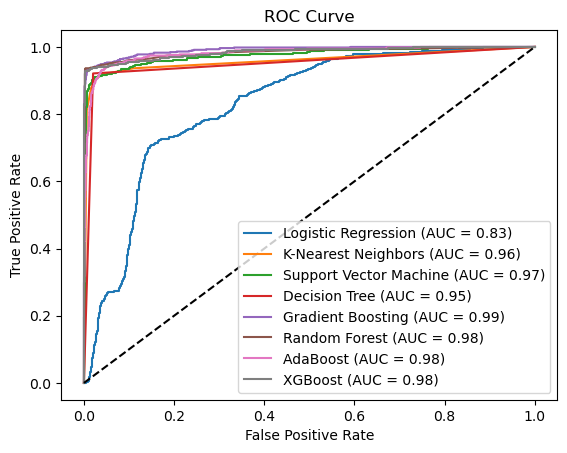

In [79]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    
    print(f"{model_name}:")
    print(f"  Accuracy: {round(accuracy, 2)}")
    print(f"  F1 Score: {round(f1, 2)}")
    print(f"  AUC: {round(auc, 2)}")
    print("-" * 40)

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [80]:
from tabulate import tabulate

In [81]:
model_names = []
accuracies = []
f1_scores = []
auc_scores = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    model_names.append(model_name)
    accuracies.append(round(accuracy, 2))  
    f1_scores.append(round(f1, 2))         
    auc_scores.append(round(auc, 2))       


results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'AUC': auc_scores})
table = tabulate(results_df, headers='keys', tablefmt='grid', showindex=False)
print(table)


+------------------------+------------+------------+-------+
| Model                  |   Accuracy |   F1 Score |   AUC |
+========================+============+============+=======+
| Logistic Regression    |       0.84 |       0.32 |  0.83 |
+------------------------+------------+------------+-------+
| K-Nearest Neighbors    |       0.96 |       0.89 |  0.96 |
+------------------------+------------+------------+-------+
| Support Vector Machine |       0.97 |       0.9  |  0.97 |
+------------------------+------------+------------+-------+
| Decision Tree          |       0.97 |       0.91 |  0.95 |
+------------------------+------------+------------+-------+
| Gradient Boosting      |       0.98 |       0.94 |  0.99 |
+------------------------+------------+------------+-------+
| Random Forest          |       0.99 |       0.96 |  0.98 |
+------------------------+------------+------------+-------+
| AdaBoost               |       0.96 |       0.89 |  0.98 |
+-----------------------

### Best Model

### Random Forest: Best for balancing performance with interpretability. It often has good accuracy without heavy tuning.
Gradient Boosting: It provides the highest accuracy but requires more computation. 
when considering the metrics Accuracy and F1 Score,Random forest is found to be the best model.



In [121]:
def predict():
    a1=eval(input('Enter the satisfactoryLevel : ')) 
    a2=eval(input('Enter the lastEvaluation :'))
    a3=eval(input('Enter the numberOfProjects:'))
    a4=eval(input('Enter the avgMonthlyHours:'))
    a5=eval(input('Enter the timeSpent.company:'))
    a6=eval(input('Enter the workAccident:'))
    a7=eval(input('Enter the promotionInLast5years:'))
    a8=eval(input('Enter the dept:'))
    a9=eval(input('Enter the salary:'))
    
    
    newob=[a1,a2,a3,a4,a5,a6,a7,a8,a9]
    ans=rf.predict([newob])[0]

    if ans==1:
        print("Yes, employee will left the company.")
    else:
        print("No, employee will not be left the company.")
        return ans

In [123]:
predict()

Enter the satisfactoryLevel :  0.38
Enter the lastEvaluation : 0.53
Enter the numberOfProjects: 5
Enter the avgMonthlyHours: 177
Enter the timeSpent.company: 5
Enter the workAccident: 0
Enter the promotionInLast5years: 0
Enter the dept: 7
Enter the salary: 1


Yes, employee will left the company.


### Conclusion on Employee Attrition Factors
After predict code:

Satisfaction Level: Employees with lower satisfaction levels are likely at a higher risk of leaving. In the examples, a satisfaction level below 0.5 often predicts attrition.

Monthly Hours: Both overworking (e.g., 250+ hours) and low engagement (e.g., fewer than 150 hours) can indicate issues leading to attrition, possibly from burnout or feeling underutilized.

Project Load: A moderate project load seems ideal. Overload or underload can result in dissatisfaction, impacting retention.

Salary and Promotion: Employees with low salaries or no promotions in the last 5 years are likely to feel undervalued, increasing attrition risk. In this sample, high attrition is predicted for those in lower salary bands.

These predictions suggest focusing retention efforts on improving employee satisfaction, managing workload, and addressing salary or career progression for high-risk groups. 